<a href="https://colab.research.google.com/github/Mhakinde/variant-annotation-workflow/blob/main/Variant_Annotation_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Create a  mock VCF file

### Subtask:
Generate a mock VCF file with more diverse sample variant data.

In [43]:
import pandas as pd
import io
import random

# Define the VCF header
vcf_header = """##fileformat=VCFv4.2
##reference=mock_ref
##INFO=<ID=QUAL,Number=1,Type=Float,Description="Quality score">
##INFO=<ID=FUNC,Number=.,Type=String,Description="Functional impact">
##INFO=<ID=GENE,Number=.,Type=String,Description="Gene name">
#CHROM\tPOS\tID\tREF\tALT\tQUAL\tFILTER\tINFO"""

# Create a larger set of mock variant records
chromosomes = [f"chr{i}" for i in range(1, 23)] + ['chrX', 'chrY']
functional_impacts = ["HIGH", "MODERATE", "LOW", "MODIFIER"]
genes = ["BRCA1", "TP53", "CFTR", "EGFR", "KRAS", "PIK3CA", "PTEN", "APC", "CDKN2A", "SMAD4"]

mock_variants = []
for i in range(500): # Generate 500 mock variants
    chrom = random.choice(chromosomes)
    pos = random.randint(1000, 1000000)
    rs_id = f"rs{random.randint(10000, 99999)}"
    ref = random.choice(["A", "T", "C", "G"])
    alt = random.choice([a for a in ["A", "T", "C", "G"] if a != ref])
    qual = round(random.uniform(10.0, 100.0), 2)
    filter_status = "PASS" if qual > 30 else "LowQual"
    func = random.choice(functional_impacts)
    gene = random.choice(genes)
    info = f"FUNC={func};GENE={gene}"
    mock_variants.append([chrom, pos, rs_id, ref, alt, qual, filter_status, info])

# Combine header and variants
vcf_content = vcf_header + "\n" + "\n".join(["\t".join(map(str, record)) for record in mock_variants])

# Write to mock_elaborate.vcf file
with open("mock_elaborate.vcf", "w") as f:
    f.write(vcf_content)

print("mock_elaborate.vcf created successfully with more data.")

mock_elaborate.vcf created successfully with more data.


## Filter variants

### Subtask:
Filter the loaded variants based on quality score and functional impact.



Convert the 'QUAL' column to numeric, filter by quality score and functional impact, and display the head and info of the filtered dataframe.



In [44]:
df['QUAL'] = pd.to_numeric(df['QUAL'], errors='coerce')

filtered_df = df[df['QUAL'] > 30].copy()

filtered_df = filtered_df[filtered_df['FUNC'].isin(['HIGH', 'MODERATE'])].copy()

display(filtered_df.head())
filtered_df.info()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,FUNC,GENE
0,chr8,418180,rs51972,T,G,75.06,PASS,MODERATE,PIK3CA
5,chr17,987592,rs60532,C,G,54.73,PASS,MODERATE,EGFR
8,chr18,144555,rs24496,A,C,46.89,PASS,HIGH,CFTR
17,chr13,882297,rs98585,A,C,79.74,PASS,HIGH,APC
20,chr17,393262,rs77958,C,G,63.46,PASS,HIGH,TP53


<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #CHROM  203 non-null    object 
 1   POS     203 non-null    int64  
 2   ID      203 non-null    object 
 3   REF     203 non-null    object 
 4   ALT     203 non-null    object 
 5   QUAL    203 non-null    float64
 6   FILTER  203 non-null    object 
 7   FUNC    203 non-null    object 
 8   GENE    203 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.9+ KB


## Annotate variants

### Subtask:
Add mock gene annotations (e.g., BRCA1, TP53) to the filtered variants.



Verify the data types of the filtered DataFrame and confirm that the 'GENE' column is suitable for the next steps.



In [45]:
# The filtered_df already contains the gene information extracted during loading.
# This step serves to confirm the data is ready for analysis.
display(filtered_df.head())
filtered_df.info()

,#CHROM,POS,ID,REF,ALT,QUAL,FILTER,FUNC,GENE
0,chr8,418180,rs51972,T,G,75.06,PASS,MODERATE,PIK3CA
5,chr17,987592,rs60532,C,G,54.73,PASS,MODERATE,EGFR
8,chr18,144555,rs24496,A,C,46.89,PASS,HIGH,CFTR
17,chr13,882297,rs98585,A,C,79.74,PASS,HIGH,APC
20,chr17,393262,rs77958,C,G,63.46,PASS,HIGH,TP53


<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 499
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #CHROM  203 non-null    object 
 1   POS     203 non-null    int64  
 2   ID      203 non-null    object 
 3   REF     203 non-null    object 
 4   ALT     203 non-null    object 
 5   QUAL    203 non-null    float64
 6   FILTER  203 non-null    object 
 7   FUNC    203 non-null    object 
 8   GENE    203 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.9+ KB


## Analyze and visualize

### Subtask:
Count variant frequency per gene and visualize the top genes with the highest variant counts.



Group the filtered variants by gene and count the occurrences of each gene, then sort the counts and select the top genes for visualization.



/tmp/ipython-input-4285183569.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genes.index, y=top_genes.values, palette='viridis')


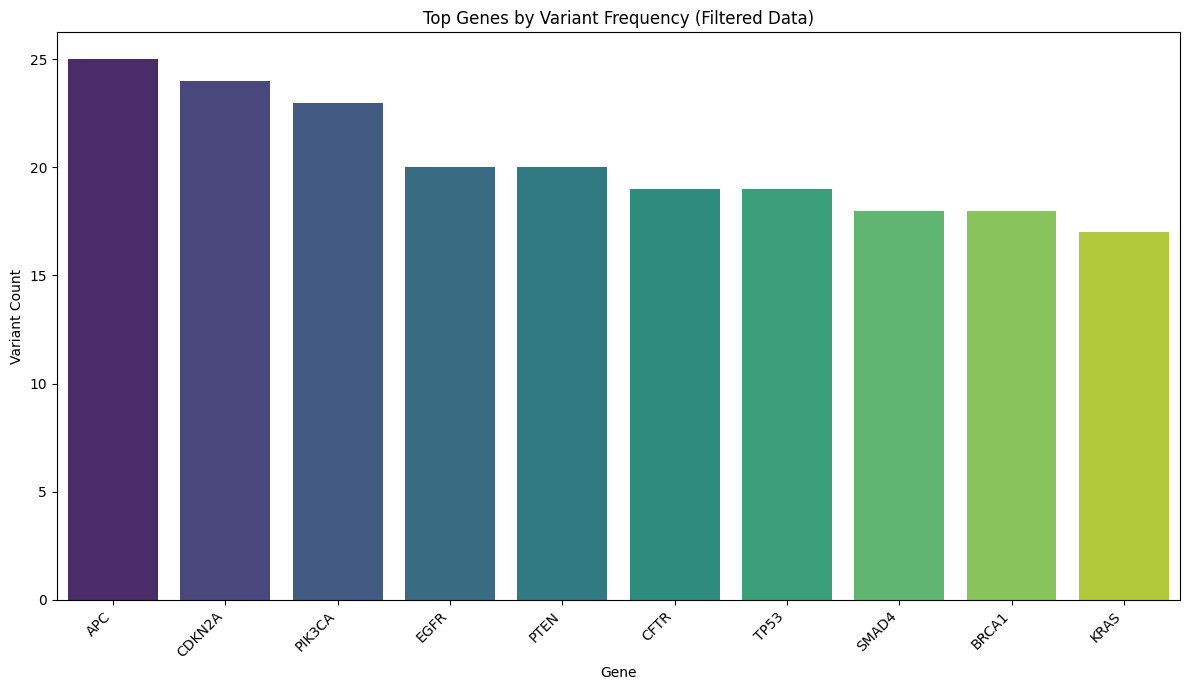

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count variant frequency per gene from the filtered data
gene_counts = filtered_df['GENE'].value_counts()

# Select top genes (e.g., top 10 for the larger dataset)
top_genes = gene_counts.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_genes.index, y=top_genes.values, palette='viridis')
plt.xlabel('Gene')
plt.ylabel('Variant Count')
plt.title('Top Genes by Variant Frequency (Filtered Data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()